### Notebook to evaluate machine learning models for multi-text classification after cleaning twitter data 

In [1]:
#Dependencies
import pandas as pd
from sklearn.externals import joblib
import numpy as np

In [2]:
fname = 'tweet_data/tweets_final_long_list_80k.csv'
df = pd.read_csv(fname, encoding='utf-8') 
df = df.loc[ : , ('Text_Clean','County')]
df.head()

df = df[pd.notnull(df['Text_Clean'])]
df = df[(df.County != 'None')].dropna()
df = df[(df.County != 'NAN')].dropna()

# Categorizing the counties

df['category_id'] = df['County'].factorize()[0]
category_id_df = df[['County', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'County']].values)
df.head(10)

,Text_Clean,County,category_id
0,talking to some great journos this morning all...,Greater London,0
1,incident severe delay m northbound between j a...,West Midlands,1
2,a little snippet from my sundayjazzcongregati...,Greater London,0
3,if youre a pharmaceutical professional in ma...,Greater Manchester,2
4,our day summit kicks off in our new office w...,Greater London,0
5,remembering charlotte bronte on the th anniver...,West Yorkshire,3
6,hell yeah x\r\r\nlook at you all posh o...,Greater London,0
7,hours to kill at london lhr in hounslow london,Greater London,0
8,heacham weather temp c amp is rising low c...,Norfolk,4
9,when life gives you lemon choux with meringue ...,Greater London,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65463 entries, 0 to 70652
Data columns (total 3 columns):
Text_Clean     65463 non-null object
County         65463 non-null object
category_id    65463 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [4]:
df.County.value_counts()

Greater London                      17132
Greater Manchester                   2571
Essex                                2114
West Yorkshire                       2049
West Midlands                        1589
Kent                                 1550
Lancashire                           1419
Surrey                               1380
Tyne and Wear                        1261
Hertfordshire                        1257
Merseyside                           1182
Suffolk                              1049
South Yorkshire                       941
Glasgow City                          882
West Sussex                           769
Edinburgh                             767
Cambridgeshire                        746
Devon                                 728
Brighton and Hove                     708
Nottinghamshire                       704
Norfolk                               703
Hampshire                             674
Shropshire                            652
Dorset                            

### Text Representation
The classifiers and learning algorithms can not directly process the text documents in their original form, as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length. 
Therefore, during the preprocessing step, the texts are converted to a more manageable representation.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=6, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.Text_Clean).toarray()

labels = df.category_id

features.shape

(65463, 13122)

Here we use <b>chi-squared</b> within feature_selection to find the words that are the most correlated with each of the counties

This computes chi-squared stats between each non-negative feature and class and can be used to select the n_features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.

In [6]:
from sklearn.feature_selection import chi2

N = 2

for county, category_id in sorted(category_to_id.items()):
    
        chi_features = chi2(features, labels == category_id)
        idx = np.argsort(chi_features[0])
    
        feature_names = np.array(tfidf.get_feature_names())[idx]
    
        unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
        bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    
        print("# '{}':".format(county))
        print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
        print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Aberdeen City':
  . Most correlated unigrams:
. prezzo
. aberdeen
  . Most correlated bigrams:
. aberdeen aberdeen
. aberdeen city
# 'Aberdeenshire':
  . Most correlated unigrams:
. iamduphotmusic
. iambjornduphot
  . Most correlated bigrams:
. iambjornduphot iamduphotmusic
. mm forecast
# 'Angus council':
  . Most correlated unigrams:
. kirriemuir
. acdc
  . Most correlated bigrams:
. bst temperature
. wind humidity
# 'Antrim And Newtownabbey':
  . Most correlated unigrams:
. antrim
. newtownabbey
  . Most correlated bigrams:
. im good
. im house
# 'Ards And North Down':
  . Most correlated unigrams:
. northernireland
. toe
  . Most correlated bigrams:
. country park
. recommend retail
# 'Argyll and Bute Council':
  . Most correlated unigrams:
. mull
. islay
  . Most correlated bigrams:
. drive home
. gorgeous weather
# 'Armagh City, Banbridge And Craigavon':
  . Most correlated unigrams:
. peoples
. banbridge
  . Most correlated bigrams:
. dont look
. yes good
# 'Bath and North Ea

# 'Gwynedd':
  . Most correlated unigrams:
. whr
. porthmadog
  . Most correlated bigrams:
. porthmadog ukweather
. ukweather wind
# 'Hampshire':
  . Most correlated unigrams:
. winchester
. hampshire
  . Most correlated bigrams:
. winchester hampshire
. new forest
# 'Hartlepool':
  . Most correlated unigrams:
. dominos
. hartlepool
  . Most correlated bigrams:
. nowplaying dominos
. demo hartlepool
# 'Herefordshire':
  . Most correlated unigrams:
. hereford
. herefordshire
  . Most correlated bigrams:
. hourly weather
. hereford tnc
# 'Hertfordshire':
  . Most correlated unigrams:
. stalbans
. harpenden
  . Most correlated bigrams:
. business marketing
. stalbans harpenden
# 'Highland Council':
  . Most correlated unigrams:
. highlands
. inverness
  . Most correlated bigrams:
. baro mb
. rain hum
# 'Inverclyde':
  . Most correlated unigrams:
. awe
. ma
  . Most correlated bigrams:
. felt good
. falling rain
# 'Isle of Anglesey':
  . Most correlated unigrams:
. anglesey
. holyhead
  . 

# 'Somerset':
  . Most correlated unigrams:
. horsehour
. somerset
  . Most correlated bigrams:
. min ave
. oat dew
# 'South Ayrshire Council':
  . Most correlated unigrams:
. racecourse
. ayr
  . Most correlated bigrams:
. walking dog
. day races
# 'South Gloucestershire':
  . Most correlated unigrams:
. disney
. walt
  . Most correlated bigrams:
. bristol avon
. disney world
# 'South Lanarkshire':
  . Most correlated unigrams:
. kilbride
. woofwoofwednesday
  . Most correlated bigrams:
. east kilbride
. south lanarkshire
# 'South Yorkshire':
  . Most correlated unigrams:
. doncaster
. sheffield
  . Most correlated bigrams:
. inn doncaster
. nowplaying beverley
# 'Southampton':
  . Most correlated unigrams:
. mooring
. southampton
  . Most correlated bigrams:
. nowplaying shooting
. shooting star
# 'Southend-on-Sea':
  . Most correlated unigrams:
. yoga
. southend
  . Most correlated bigrams:
. sea southend
. southend sea
# 'Staffordshire':
  . Most correlated unigrams:
. cannock
. st

### Comparing different classification models

In this part, we test 4 different classification models for accuracy
- Naive Bayes
- Linear SVC
- Logistic Regression
- Random Forest


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

<b> Splitting the data in Train (2/3) and Test (1/3) </b> 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df['Text_Clean'], df['County'], test_size=0.33, random_state = 42)

# For word vectorization
vect_count = CountVectorizer()

X_train_counts = vect_count.fit_transform(X_train)

# To Transform a count matrix to a normalized tf or tf-idf representation 
# Tf means term-frequency while tf-idf means term-frequency times inverse document-frequency.

tfidf_tr = TfidfTransformer()

X_train_tfidf = tfidf_tr.fit_transform(X_train_counts)

In [9]:
# Comparing 4 models

models = [
    RandomForestClassifier(n_estimators=200, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
        cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The mi

<b> Plotting the accuracy for the models..<b>

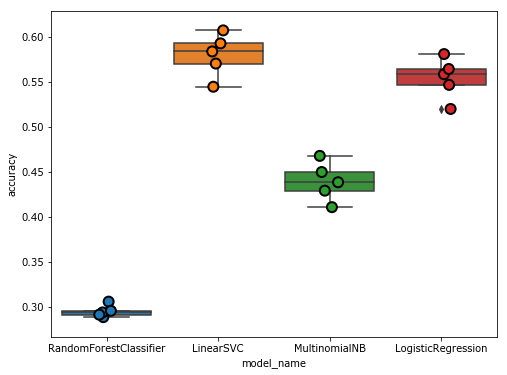

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, size=10, jitter=True, edgecolor="black", linewidth=2)

plt.show()

In [13]:
# The mean accuracy for each of the models

cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.580184
LogisticRegression        0.554457
MultinomialNB             0.439472
RandomForestClassifier    0.295147
Name: accuracy, dtype: float64

### Comment: LinearSVC seems to be the most accurate model!!

We will use Calibrated SVC to show the probabilities distribution for each label (county)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.calibration import CalibratedClassifierCV


labels = df['County']
text = df['Text_Clean']

X_train, X_test, y_train, y_test = train_test_split(text, labels, random_state=0, test_size=0.3)

count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)

tf_transformer = TfidfTransformer().fit(X_train_counts)

X_train_transformed = tf_transformer.transform(X_train_counts)

X_test_counts = count_vect.transform(X_test)

X_test_transformed = tf_transformer.transform(X_test_counts)

labels = LabelEncoder()

y_train_labels_fit = labels.fit(y_train)

y_train_labels_trf = labels.transform(y_train)

print(f' This are the counties: {labels.classes_}')

 This are the counties: ['Aberdeen City' 'Aberdeenshire' 'Angus council' 'Antrim And Newtownabbey'
 'Ards And North Down' 'Argyll and Bute Council'
 'Armagh City, Banbridge And Craigavon' 'Bath and North East Somerset'
 'Bedford' 'Belfast' 'Blackburn with Darwen' 'Blackpool' 'Blaenau Gwent'
 'Borough of Halton' 'Bracknell Forest' 'Bridgend County Borough'
 'Brighton and Hove' 'Buckinghamshire' 'Caerdydd'
 'Caerphilly County Borough' 'Cambridgeshire' 'Cardiff' 'Carmarthenshire'
 'Castell-nedd Port Talbot' 'Causeway Coast and Glens'
 'Central Bedfordshire' 'Ceredigion' 'Cheshire East'
 'Cheshire West and Chester' 'City of Bristol' 'Clackmannanshire' 'Conwy'
 'Conwy Principal Area' 'Cornwall' 'County Durham' 'Cumbria' 'Darlington'
 'Denbighshire' 'Derby' 'Derbyshire' 'Derry And Strabane' 'Devon' 'Dorset'
 'Dumfries and Galloway' 'Dundee City Council' 'East Ayrshire Council'
 'East Dunbartonshire Council' 'East Lothian Council'
 'East Renfrewshire Council' 'East Riding of Yorkshire' 'East 

In [19]:
linear_svc = LinearSVC()
clf = linear_svc.fit(X_train_transformed, y_train_labels_trf)

calibrated_svc = CalibratedClassifierCV(base_estimator=linear_svc,cv="prefit")

calibrated_svc.fit(X_train_transformed,y_train_labels_trf)
predicted = calibrated_svc.predict(X_test_transformed)

### Saving Models

In [24]:
from sklearn.externals import joblib
# save classifier
model_filename = 'saved_models/svc_classifier.pkl'
joblib.dump(calibrated_svc, model_filename) 

# save transformer
transformer_filename = 'saved_models/svc_transf.pkl'
joblib.dump(tf_transformer, transformer_filename) 

# save count_vect
counter_filename = 'saved_models/svc_counter.pkl'
joblib.dump(count_vect, counter_filename) 

['saved_models/svc_counter.pkl']

### Testing Predictions

In [25]:
to_predict = ["Dublin is great"]

p_count = count_vect.transform(to_predict)
p_tfidf = tf_transformer.transform(p_count)


# print('Average accuracy on test set={}'.format(np.mean(predicted == labels.transform(y_test))))
print('Predicted probabilities')
print(calibrated_svc.predict_proba(p_tfidf))

Predicted probabilities
[[1.83710196e-05 1.45233452e-06 1.47241993e-05 1.15833766e-05
  2.70174115e-05 9.05686255e-05 5.40718220e-06 1.22240636e-04
  1.43966573e-04 3.74665682e-04 9.23305900e-06 4.61570823e-05
  2.59315326e-04 2.61087624e-04 1.78622576e-05 3.04311621e-05
  1.94843682e-02 2.26110061e-04 2.28818796e-05 6.50752709e-05
  1.62707826e-04 2.97676642e-04 2.92420687e-05 2.25352355e-05
  1.38553554e-04 1.54061427e-04 1.21296653e-05 9.28371533e-01
  2.19184106e-05 2.85833431e-04 1.94094267e-05 4.37413312e-05
  7.77234355e-05 1.23318885e-04 5.41595701e-04 1.65532011e-04
  2.82121554e-04 6.84806182e-05 3.35180292e-05 1.43788966e-06
  5.61413607e-05 3.96764520e-04 2.46966943e-04 2.68043446e-05
  3.58899953e-04 4.03359662e-06 6.49210257e-06 7.05561709e-05
  4.46357339e-05 1.41236653e-05 2.60790107e-04 6.23551428e-04
  6.72312300e-04 4.68800788e-05 3.47388757e-05 1.41964266e-04
  1.95496658e-05 1.37242095e-04 1.10074295e-04 7.58336854e-03
  1.11082958e-04 5.39691245e-05 1.52396306e-02

In [26]:
results = pd.DataFrame(calibrated_svc.predict_proba(p_tfidf)*100, columns=labels.classes_).transpose()
results.sort_values(0, ascending = False).head(10).to_json()

'{"0":{"Cheshire East":92.8371533484,"Brighton and Hove":1.9484368192,"Hampshire":1.5239630551,"West Midlands":0.7585231336,"Greater London":0.7583368541,"West Yorkshire":0.2116382253,"South Yorkshire":0.1187254309,"Northamptonshire":0.0905085493,"North Yorkshire":0.0754084401,"Wrexham Principal Area":0.0735013335}}'

## Loading svc model and testing

In [33]:
#model
model_filename = 'saved_models/svc_classifier.pkl' 

#transformer
transformer_filename = 'saved_models/svc_transf.pkl'

#count_vect
counter_filename = 'saved_models/svc_counter.pkl'

tf = joblib.load(transformer_filename)
count = joblib.load(counter_filename)

clf = joblib.load(model_filename)
clf

CalibratedClassifierCV(base_estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
            cv='prefit', method='sigmoid')

In [39]:
texts = ["Dublin from Sutton this afternoon ⁦@PhotosOfDublin #Dublin #Ireland #sunset",
         "rain today, AGAIN, This weather sucks",
         "I hope to live long enough to see the back of #Brexit",]

text_count = count.transform(texts)
text_features = tf.transform(text_count)
# predictions = clf.predict_proba(text_features)
predictions = pd.DataFrame(clf.predict_proba(text_features)*100, columns=labels.classes_).transpose()

In [40]:
predictions.sort_values(0, ascending = False).head(10).to_json()

'{"0":{"Cheshire East":57.9992531992,"Hampshire":30.6526146343,"Greater London":5.864574667,"West Midlands":3.8750357877,"Edinburgh":0.4165999045,"Brighton and Hove":0.2280973737,"Armagh City, Banbridge And Craigavon":0.0656813817,"Kent":0.0542440882,"York":0.0531417975,"North Somerset":0.047392984},"1":{"Cheshire East":0.103343197,"Hampshire":0.0032741643,"Greater London":5.3677938643,"West Midlands":2.5803170643,"Edinburgh":0.7616629448,"Brighton and Hove":0.4974990985,"Armagh City, Banbridge And Craigavon":0.0178634513,"Kent":41.3132228106,"York":0.0969201184,"North Somerset":0.0015943708},"2":{"Cheshire East":0.0013485119,"Hampshire":0.0403793852,"Greater London":92.8468247071,"West Midlands":0.0524360907,"Edinburgh":0.3690005334,"Brighton and Hove":0.0025465691,"Armagh City, Banbridge And Craigavon":0.0005164467,"Kent":0.2409941791,"York":0.0033367726,"North Somerset":0.0000729853}}'